# Investigating Numpy.random

## About the package

<img src="http://www.numpy.org/_static/numpy_logo.png" width = '400'>

## Simple Random Data 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Rand()

The Rand function returns random samples from a uniform distrubution

In [19]:
y = np.random.rand(2)
print(y)

[0.30297123 0.55832209]


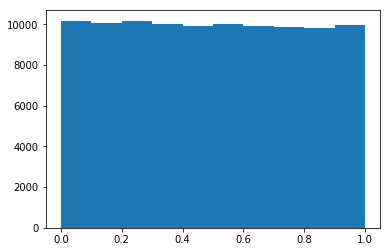

In [3]:
y = np.random.rand(100000)
plt.hist(y)
plt.show()

As you can see from the histogram of 100,000 random generated samples, this function returns a value between zero and one.

**Negative dimensions are not allowed.** So np.random.rand(-10) would give an error, as it's impossible to list a negative number of samples. 

### Randn()

The Randn function, gives you a random number from the standard normal distribution, with mean zero and standard deviation 1. So by the Empirical Rule, we can expect to find 99.7% of data between - 3 and +3, as shown below. 

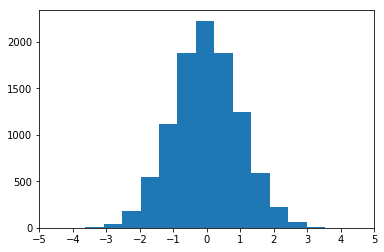

In [4]:
#First let's plot this as a histogram, with x axis from - 5 to 5
x = np.random.randn(10000)
plt.hist(x, bins = 14)
plt.xlim(-5, 5)
plt.xticks(np.arange(-5, 6, step=1))
plt.show()


This data seems to fit what we had been expecting from the Empirical Rule. 

### Randint()

This function returns random integers from the Uniform Distribution. This distribution is sometimes referred to as the regtangular distribution, and results when every value in the range has equal probability of been chosen. When using Randint(), you set a low to high interval, from which randomly generated numbers are chosen. You also set size equal to the number of random integers you want from within that range. If you don't include size, then only one random integer is chosen.


**Examples:** Using randint() to generate one whole number between two values. 

1. Here, randint() will return a number between 2 and 100. It may return the integer 2, but it will never return 100. 

In [5]:
np.random.randint(2, 100)

8

2. In my second example randint() will return a negative number between - 100 and 0. It will never return 0, but may return - 100.

In [6]:
np.random.randint(-100, 0)

-94

    Note: This function will only work when the smallest number comes first. For example if you were to call np.rand.randint(100, 2), you would receive an error. 


4. Below a set of 2000 random integers are been generated. As I have only set one value, this function takes that value to be the high value, and generates numbers in the range 0 to high. Here my high is 30, so my generated set, contains 2000 numbers between 0 and 29 inclusive.

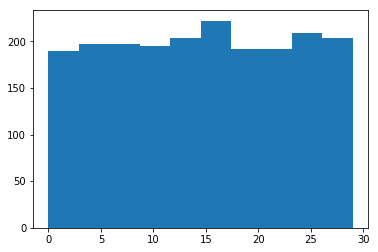

In [7]:
rand_int= np.random.randint(30, size = 2000)
plt.hist(rand_int)
plt.show()

## Permutations

### Shuffle

In [8]:
a = np.arange(10)
print('A:       ', a)
np.random.shuffle(a)
print('Shuffle: ', a)

A:        [0 1 2 3 4 5 6 7 8 9]
Shuffle:  [5 2 8 9 7 6 0 3 4 1]


### Permuations


In [9]:
np.random.permutation(a)
print('Permutate: ', a)

Permutate:  [5 2 8 9 7 6 0 3 4 1]


## Distributions

### Uniform Distribution

Using np.random.uniform, returns a float number between a low and high range. You can set size equal to a number, to return that many randomly generated values. Similar to the randint() function, your size cannot be a negative dimension or you receive an error. 

But in contrast to the randint() function, it is not necessary to call the low value first. 

**For example** np.random.uniform(30, 1) and np.random.uniform(1, 30) will both return a value between 1 and 30. 

In [10]:
t = np.random.uniform(30, 1)
print(t)
t = np.random.uniform(1,30)
print(t)

15.114192148396866
5.987423296231003


Example 1: Let's begin by generating a random list of 40 numbers between 0 and 20. 

As the default low value is already zero, I only need to set my high value as 20, and specify size 40.

In [11]:
uni=np.random.uniform(20, size =40)
uni=np.around(uni, decimals=3)
print(uni)

[ 2.912  4.659 12.812 16.936 15.211 12.249 10.068  3.626 10.415 14.427
 11.431  9.417  8.923  4.287 15.4    6.529  2.881 17.205  5.047 19.922
  7.94   2.825  7.815  6.432 15.203 14.707  2.435  3.208  9.224  3.946
  4.693  7.781  6.679 11.427  8.116 10.472  1.98  14.301 17.273  4.152]


Example 2: Generate 10 numbers between 300 and 600.

In [12]:
uni_sample=np.random.uniform(300, 600, size=10)
print(uni_sample)

[462.03763275 415.06509293 332.95461775 474.20972407 349.6094666
 565.18939063 466.85158872 375.19457892 372.4396728  433.07775377]


Plotting these values on a histogram, it's very likely that my distribution will not appear Uniform. This is due to the fact I have a very small set with only 10 samples. 

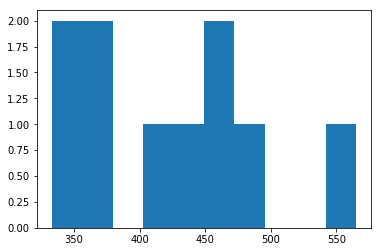

In [13]:
plt.hist(uni_sample)
plt.show()

So increasing the size of our set to 4000 values, instead of 10, should give us a better indication of the distribution of data that this function generates

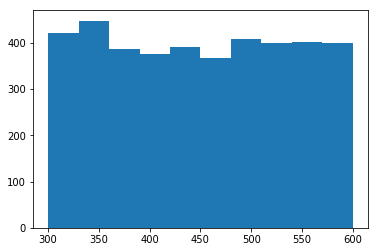

In [14]:
uni_sample=(np.random.uniform(300, 600, size= 4000))
plt.hist(uni_sample)
plt.show()

This function generates a float number between two values, and as I have set my values to be integers, there is an infinite number of possibile outcomes. The uniform function returns an even spread of values in the low to high interval, but the histogram above should not be taken to imply that even value between 300 and 600 is represented.

### Binomial Distribution

The Binomial Distribution in probability is the distribution of successes in  Binomial or Bernoulli trial. 

In a Bernoulli trial
* There are n independent trials
* Each trial has only two possible outcomes, ie Heads or Tails, Pass or Fail
* The probability of success is the same in each trial, and is denoted with the letter p

So the random.binomial() function takes the same parameters and can be used to simulate probability experiments.

### Flipping a Coin

If you flip a coin you can get either heads or tails, and each has a 50% chance of success. Let's say that I flip a coin 100 times, and I want to get heads. The binomial() function can simulate that experiment. 

In [15]:
heads = np.random.binomial(100, 0.5, 1)
print('I got %.0f heads, and %.0f tails in 100 trials' % (sum(heads), 100 - sum(heads)))

I got 52 heads, and 48 tails in 100 trials


Now what if I have 30 people all doing the same experiment. 

30 people each flip a coin 100 times and record their results, then we'd have 3000 flips of a coin. Our experimental probability should be even closer to our expected probability with that many trials. So let's run that simulation and see what we get.

In [16]:
new_heads = np.random.binomial(100, 0.5, 30)
print('We get %.0f heads, and %.0f tails in 3000 trials' % (sum(new_heads), 30*100 - sum(new_heads)))

We get 1524 heads, and 1476 tails in 3000 trials


Plotting the data from my 30 helpers, shows that there are no outliers with most getting between 40 and 60 heads when they flipped the coin

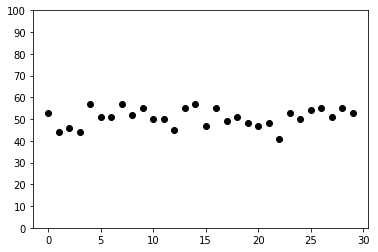

In [17]:
plt.plot(new_heads, 'ko')
plt.xticks(range(0, 35, 5))
plt.yticks(range(0, 101, 10))
plt.show()

### Normal Distribution

A Normal Distribution is symmetrical about the mean of the set of data. 

In [85]:
norm_x = np.around(np.random.normal(32, 5), decimals = 3)
norm_x

42.434

The package contains the function Standard_normal(), which returns random numbers form the 


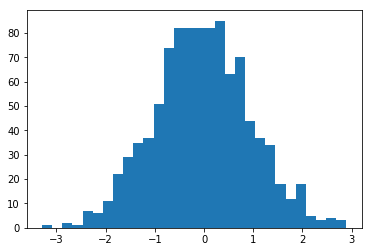

In [82]:
st_norm = np.random.standard_normal(1000)
plt.hist(st_norm, bins = 30)
plt.show()

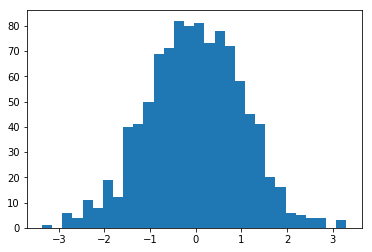

In [83]:
norm= np.random.normal(0, 1, 1000)
plt.hist(norm, bins=30)

plt.show()


### Four

### FIve

## Seeds and Pseudo-random Numbers

## References

* [NumPy v1.15 Manual, Random sampling (numpy.random)](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html)